In [1]:
##Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf

from sklearn.model_selection import train_test_split
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [2]:
##Here I'll import my main dataset

pokemon_db =  pd.read_csv('Pokemon.csv',encoding='utf-8', sep=',', header=0)

display(pokemon_db.head())

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


NOW I'LL MAKE SOME EXPLORATORY ANALYSIS INTO THE DATA

    1. DISCOVERING THE MOST PREDOMINANT POKEMON TYPES

Here we can see the most common types of Pokemon in all the regions. The most common type is Water followed by Normal .



,Type 1,Count
0,Water,112
1,Normal,98
2,Grass,70
3,Bug,69
4,Psychic,57
5,Fire,52
6,Rock,44
7,Electric,44
8,Ground,32
9,Ghost,32


Now lets make some viz so we can better visualize this data. Ill use a pie chart here.


Text(0.5, 1.0, 'Pokemon Type Distribution [%]')

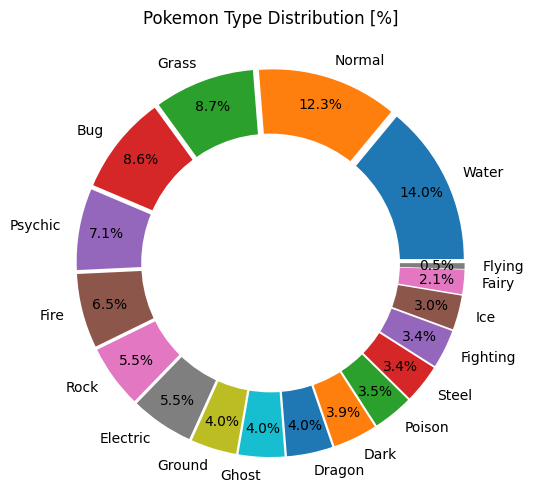

In [3]:
##Let's see the pokemon's most common types



pokemon_types_db = sqldf('''

SELECT pokemon_db.'Type 1', COUNT(pokemon_db.'Type 1') as Count

                    FROM pokemon_db

        GROUP BY pokemon_db.'Type 1'
        
        ORDER BY COUNT(pokemon_db.'Type 1') DESC

''')


print('Here we can see the most common types of Pokemon in all the regions. The most common type is',pokemon_types_db['Type 1'][0],'followed by',pokemon_types_db['Type 1'][1],'.\n')
display(pokemon_types_db)



fig, ax = plt.subplots(1,1,figsize=(6,6))


print('Now let''s make some viz so we can better visualize this data. I''ll use a pie chart here.')


##Now We'll make some graphics in order to get a better visualization of the data

##creates explode array 

my_explode = [0.05]*len(pokemon_types_db['Count'])


##creates pie chart
ax.pie(pokemon_types_db['Count'],  labels=pokemon_types_db['Type 1'],autopct='%1.1f%%', pctdistance=0.85,  explode=my_explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1 = plt.gcf()
 
# Adding Circle in Pie chart
fig1.gca().add_artist(centre_circle)
 
# Adding Title of chart
ax.set_title('Pokemon Type Distribution [%]')

2.IDENTIFYING DISPERSION OF POKEMON PER TOTAL AND HP


Here Ill just make a subquery so I can replace the 0s and 1s in the Legendary Collumn by Legendary and Non-Legendary.

Here we are able to see that legendary pokemon have a tendency to have higher total stats and attack attributes. We also have to be careful, because there some normal pokemon that figure among the legendary in terms of stats levels.


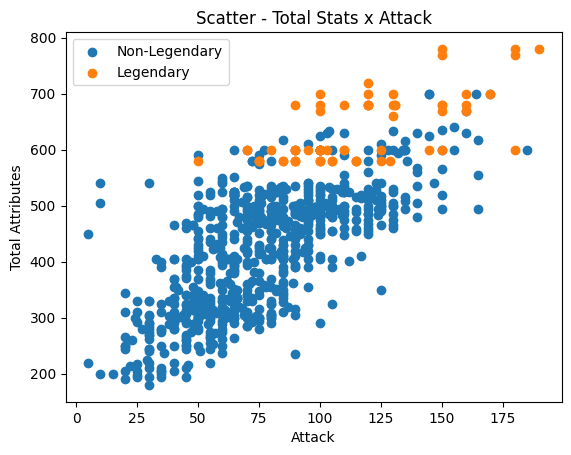

In [4]:
##Here I''ll just make a subquery so I can replace the 0s and 1s in the Legendary Collumn by Legendary and Non-Legendary
print('\nHere I''ll just make a subquery so I can replace the 0s and 1s in the Legendary Collumn by Legendary and Non-Legendary.')

pokemon_new_legend_db = sqldf('''

SELECT *, CASE WHEN Legendary in (0) then 'Blue' else 'Orange'  end as 'Legendary Color'

                            From pokemon_db


''')


print('\nHere we are able to see that legendary pokemon have a tendency to have higher total stats and attack attributes. We also have to be careful, because there some normal pokemon that figure among the legendary in terms of stats levels.')


##Now we'll plot this info into a scatterplot so we can better understand it

fig, ax = plt.subplots()

ax.scatter( pokemon_new_legend_db.query('Legendary==0')['Attack'],pokemon_new_legend_db.query('Legendary==0')['Total'])
ax.scatter( pokemon_new_legend_db.query('Legendary==1')['Attack'],pokemon_new_legend_db.query('Legendary==1')['Total'])
ax.legend(["Non-Legendary" , "Legendary"])
ax.set_ylabel('Total Attributes')
ax.set_xlabel('Attack')
ax.set_title('Scatter - Total Stats x Attack')

plt.show()

In [5]:
##Separating my analysis variables
##We'll use as independent variables all columns except the one we want to estimate with our decision tree.

X = pokemon_db.drop(['Legendary','Name','#','Generation','Speed','Defense'], axis=1)
y = pokemon_db['Legendary'] 

In [6]:
##Creating train and test selections

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [7]:
##Encoding Train and test collumns columns


##Gotta encode text columns because the model only accepts numbers

encoder = ce.OrdinalEncoder(cols=['Type 1','Type 2'])##, 'Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

NOW WE'LL CALCULATE THE CLASSIFIER, I'LL LEAVE BELLOW A LINK EXPLAING THE DIFFERENCE BETWEEN THE AVAILABLE CRITERIA

https://medium.com/geekculture/criterion-used-in-constructing-decision-tree-c89b7339600f

In [8]:
##Now I'll import the classifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [9]:
##Now making predictions with our test data

y_pred_en = clf_en.predict(X_test)

In [10]:
##Calculating Score of the decision tree with our test data

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.9697


In [11]:
##Now let's display the scores of both sets

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
     

Training set score: 0.9888
Test set score: 0.9697


[Text(0.5294117647058824, 0.9375, 'x[2] <= 577.5\nentropy = 0.441\nsamples = 536\nvalue = [487, 49]'),
 Text(0.47058823529411764, 0.8125, 'entropy = 0.0\nsamples = 452\nvalue = [452, 0]'),
 Text(0.5882352941176471, 0.8125, 'x[4] <= 131.5\nentropy = 0.98\nsamples = 84\nvalue = [35, 49]'),
 Text(0.35294117647058826, 0.6875, 'x[2] <= 647.0\nentropy = 0.875\nsamples = 61\nvalue = [18, 43]'),
 Text(0.29411764705882354, 0.5625, 'x[2] <= 585.0\nentropy = 0.966\nsamples = 46\nvalue = [18, 28]'),
 Text(0.17647058823529413, 0.4375, 'x[5] <= 127.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.11764705882352941, 0.3125, 'x[4] <= 117.5\nentropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(0.058823529411764705, 0.1875, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.17647058823529413, 0.1875, 'x[4] <= 122.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.11764705882352941, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.0625, 'ent

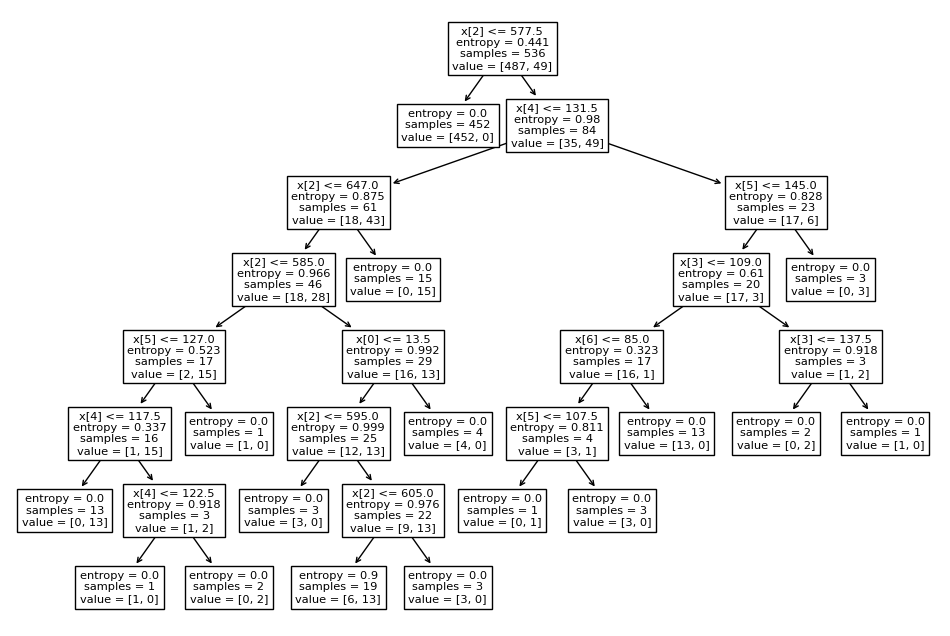

In [12]:
##Let's print our decision tree now

plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [13]:
##Now let's print the confusion matrix

print('Here we have a way to measure the performance of our model, comparing our test y with our y(xtest)\n')


cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix:\n\n', cm)

print('\nTrue Positives: {:.0f}'.format(cm[0][0]))
print('\nFalse Positives: {:.0f}'.format(cm[0][1]))
print('\nFalse Negatives: {:.0f}'.format(cm[1][0]))
print('\nTrue Negatives: {:.0f}'.format(cm[1][1]))


Here we have a way to measure the performance of our model, comparing our test y with our y(xtest)

Confusion matrix:

 [[243   5]
 [  3  13]]

True Positives: 243

False Positives: 5

False Negatives: 3

True Negatives: 13


NOW LET'S TAKE SOME DEFAULT METRICS FROM SKLEARN LIBRARY.

BELLOW THERE IS A BRIEF EXPLANATION ON THESE METRICS:

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [14]:
###Now let's print some more metrics:

report = classification_report(y_test, y_pred_en,output_dict=True)

print('First of all, let''s print our metrics:\n\n')

print(classification_report(y_test, y_pred_en))

print('\n\nNow let''s draw some conclusions:\n')

print('- Precision: Out of all the legendary predictions, {:.02f} % actually got it correct.\n'.format(report['True']['precision']*100 ))
print('- Recall: Out of all the pokemon the model predicted as legendary, {:.02f} % were actually legendary.\n'.format(report['True']['recall']*100 ))





First of all, lets print our metrics:


              precision    recall  f1-score   support

       False       0.99      0.98      0.98       248
        True       0.72      0.81      0.76        16

    accuracy                           0.97       264
   macro avg       0.86      0.90      0.87       264
weighted avg       0.97      0.97      0.97       264



Now lets draw some conclusions:

- Precision: Out of all the legendary predictions, 72.22 % actually got it correct.

- Recall: Out of all the pokemon the model predicted as legendary, 81.25 % were actually legendary.



Now lets take a look on the importance of each feature in the models prediction.

If the importance is equal or near zero, we can discard this feature from the analysis, since the result wont be affected.
 
In this case, we see that the only measures that matter are the Total attributes, Attack and Special Attack.
 


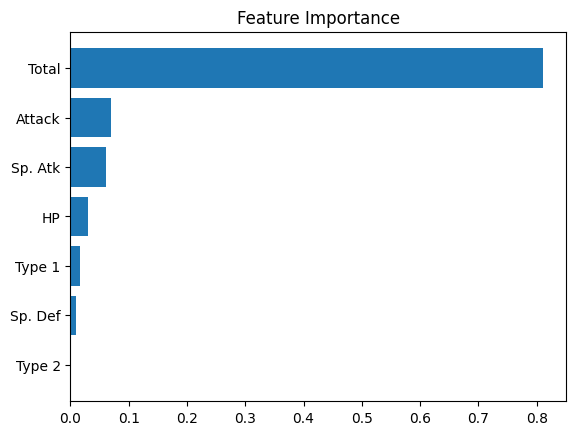

In [15]:
##Calculating feature importances

print('Now let''s take a look on the importance of each feature in the models prediction.\n')
print('If the importance is equal or near zero, we can discard this feature from the analysis, since the result won''t be affected.\n ')
print('In this case, we see that the only measures that matter are the Total attributes, Attack and Special Attack.\n ')


importances = clf_en.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()

ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(X_train.columns)[indices])

ax.set_title('Feature Importance')

plt.show()


NOW THAT WE HAVE OUR FINAL MODEL, LETS MAKE A FINAL TEST WITH SOME RANDOM POKEMONS

In [16]:
##Preparing a test database


##Let's query into our database and get data from both legendary and non-legendary cases
print('Let''s query into our database and get data from both legendary and non-legendary cases:\n')
final_test_db = sqldf('''


with non_leg as (   select * from pokemon_db where legendary in (false) limit 5),
     leg as (   select * from pokemon_db where legendary in (true) limit 5)
        
        SELECT * from non_leg
UNION 
SELECT * from leg

''')



display(final_test_db)

Lets query into our database and get data from both legendary and non-legendary cases:



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0
5,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,1
6,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,1
7,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,1
8,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,1
9,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1


In [17]:
##Defining decision tree input and enconding it 

x_final = final_test_db.drop(['Legendary','Name','#','Generation','Speed','Defense'], axis=1)
x_final = encoder.fit_transform(x_final)
display(x_final)

,Type 1,Type 2,Total,HP,Attack,Sp. Atk,Sp. Def
0,1,1,318,45,49,65,65
1,1,1,405,60,62,80,80
2,1,1,525,80,82,100,100
3,1,1,625,80,100,122,120
4,2,4,309,39,52,60,50
5,3,2,580,90,85,95,125
6,4,2,580,90,90,125,90
7,2,2,580,90,100,125,85
8,5,4,680,106,110,154,90
9,5,3,780,106,190,154,100


In [18]:
##Now making predictions with our data

y_final = clf_en.predict(x_final)
display(y_final)


array([False, False, False, False, False,  True,  True,  True,  True,
        True])

Here we can see an example of test database, with the input collumns and comparation from real value and estimation.


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Results,Correctly Estimated
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,False,True
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,False,True
5,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,True,True
6,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,True,True
7,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,True,True
8,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True,True,True
9,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,True,True




In this case we can see that from 10.00 cases, 10.00 were correctly estimated. Although it could be better, it is safe to say tha the model is capable of correctly estimate most of cases

Below we can see a viz that shows the models success percentage in this final test.


Text(0.5, 1.0, 'Model Success Percentage in Final Test [%]')

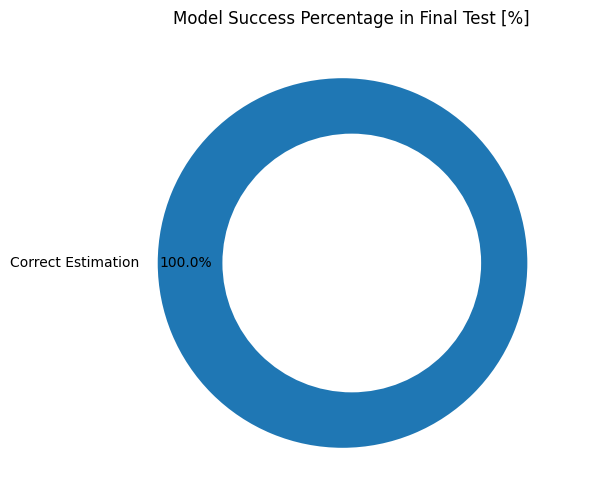

In [19]:
##Appending our calculated tree into the final dataframe


print('Here we can see an example of test database, with the input collumns and comparation from real value and estimation.')

final_test_db['Results'] = y_final

##Replacing zeroes and ones in legendary collumn

final_test_db['Legendary'].replace(0, False, inplace=True)
final_test_db['Legendary'].replace(1, True, inplace=True)

##Adding Calculated Collumn

final_test_db['Correctly Estimated'] =  np.where(final_test_db['Legendary'] == final_test_db['Results'], True, False)


display(final_test_db)

count_ok = len(final_test_db[final_test_db['Correctly Estimated']==True])

count_wrong = len(final_test_db[final_test_db['Correctly Estimated']==False])

print('\n\nIn this case we can see that from {:.02f} cases, {:.02f} were correctly estimated. Although it could be better, it is safe to say tha the model is capable of correctly estimate most of cases'.format(count_ok+count_wrong,count_ok))
print('\nBelow we can see a viz that shows the model''s success percentage in this final test.')

fig, ax = plt.subplots(1,1,figsize=(6,6))


##First, let's make a quick SQL query in order to group our data for the pie chart

pie_final_data = sqldf(''' Select case when final_test_db.'Correctly Estimated' in (True) then 'Correct Estimation' Else 'Incorrect Estimation' end as 'Correctly Estimated', count(final_test_db.'Correctly Estimated') as count from final_test_db group by final_test_db.'Correctly Estimated'


''')


##Now We'll make some graphics in order to get a better visualization of the data

##creates explode array 

my_explode = [0.05]*len(pie_final_data['Correctly Estimated'])


##creates pie chart
ax.pie(pie_final_data['count'],  labels=pie_final_data['Correctly Estimated'],autopct='%1.1f%%', pctdistance=0.85,  explode=my_explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1 = plt.gcf()
 
# Adding Circle in Pie chart
fig1.gca().add_artist(centre_circle)
 
# Adding Title of chart
ax.set_title('Model Success Percentage in Final Test [%]')

